# Visualizing The Gender Gap In College Degrees

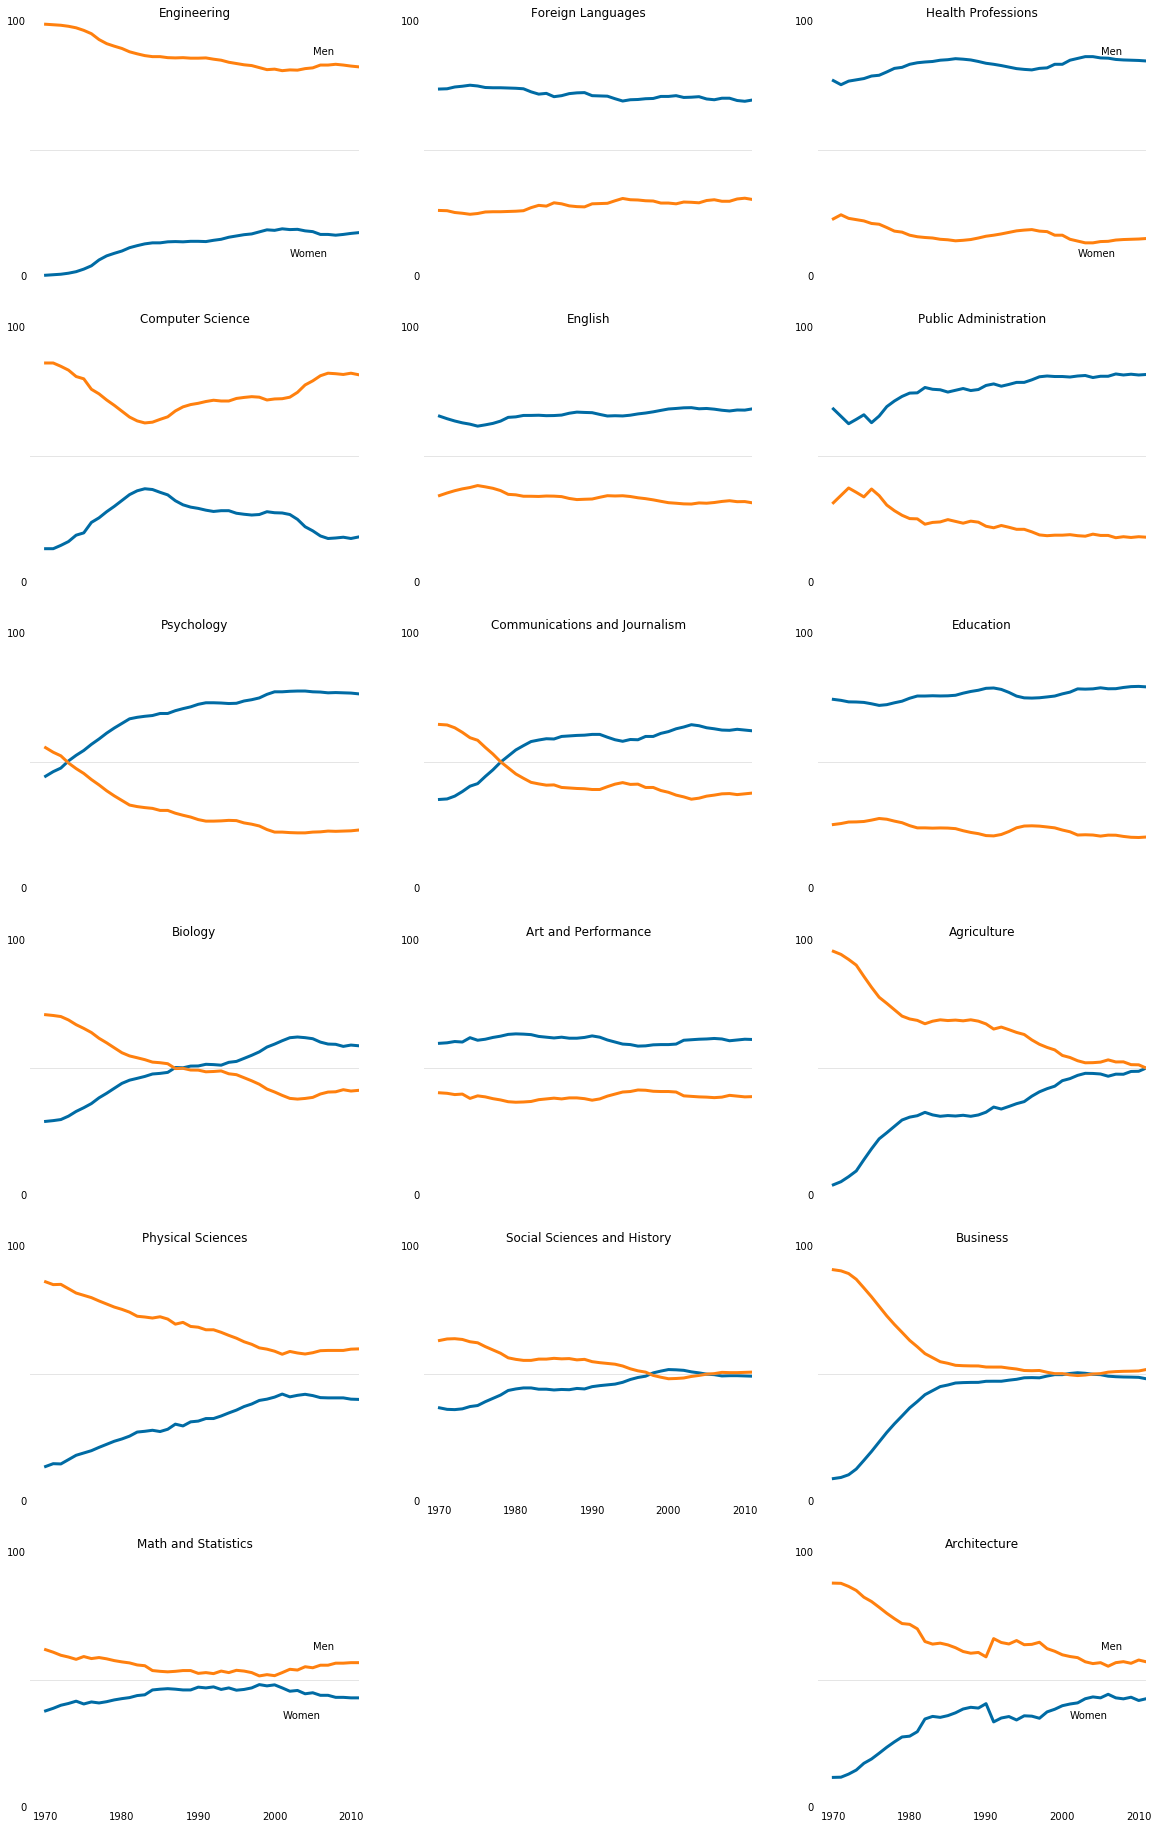

In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Paramater is optional
def plot_clean(sp=1):
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(20, 32))

last = 1
for sp in range(0,6):
   
    ax = fig.add_subplot(6,3,sp+last)   
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)  
    ax.set_title(stem_cats[sp])
    plot_clean(sp)
#  enable the x-axis labels for the bottommost line charts in each column 
    if sp == 5:
        ax.tick_params(labelbottom='on')
    if sp < 5:
        ax = fig.add_subplot(6,3,sp+last+1)    
        ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[(sp)]], c=cb_dark_blue, label='Women', linewidth=3)
        ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[(sp)]], c=cb_orange, label='Men', linewidth=3)
        ax.set_title(lib_arts_cats[(sp)])
        plot_clean()
#  enable the x-axis labels for the bottommost line charts in each column     
    if sp == 4:
        ax.tick_params(labelbottom='on')
    ax = fig.add_subplot(6,3,sp+last+2)    
    ax.plot(women_degrees['Year'], women_degrees[other_cats[(sp)]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[(sp)]], c=cb_orange, label='Men', linewidth=3)   
    ax.set_title(other_cats[(sp)])
    plot_clean(sp)
#  enable the x-axis labels for the bottommost line charts in each column 
    if sp == 5:
        ax.tick_params(labelbottom='on')
    last = last + 2

# Export the figure containing all of the line charts        
plt.savefig("gender_degrees.png")
plt.show()